<a href="https://colab.research.google.com/github/ebi19912/AI/blob/main/colorization_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install kaggle
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 111.6 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.6 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 72 bytes


In [ ]:
!pip install imagehash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 67.1 MB/s eta 0:00:00


In [ ]:
!kaggle datasets download -d vishesh1412/celebrity-face-image-dataset
!unzip celebrity-face-image-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/vishesh1412/celebrity-face-image-dataset
License(s): CC0-1.0
 96% 51.0M/52.9M [00:02<00:00, 29.7MB/s]
100% 52.9M/52.9M [00:02<00:00, 20.4MB/s]
Archive:  celebrity-face-image-dataset.zip
  inflating: Celebrity Faces Dataset/Angelina Jolie/001_fe3347c0.jpg  
  inflating: Celebrity Faces Dataset/Angelina Jolie/002_8f8da10e.jpg  
  inflating: Celebrity Faces Dataset/Angelina Jolie/003_57612506.jpg  
  inflating: Celebrity Faces Dataset/Angelina Jolie/004_f61e7d0c.jpg  
  inflating: Celebrity Faces Dataset/Angelina Jolie/005_582c121a.jpg  
  inflating: Celebrity Faces Dataset/Angelina Jolie/006_9135205d.jpg  
  inflating: Celebrity Faces Dataset/Angelina Jolie/007_cabbfcbb.jpg  
  inflating: Celebrity Faces Dataset/Angelina Jolie/008_d1f87068.jpg  
  inflating: Celebrity Faces Dataset/Angelina Jolie/009_fb3e6174.jpg  
  inflating: Celebrity Faces Dataset/Angelina Jolie/010_f99d79e3.jpg  
  inflating: Celebrity Faces Dataset/Angelina Jolie/011_734

In [ ]:

import shutil
import os

source_directory = "/content/Celebrity Faces Dataset"
destination_directory = "/content/combined_photos"

# Create the destination directory if it doesn't exist
os.makedirs(destination_directory, exist_ok=True)

for root, _, files in os.walk(source_directory):
    for file in files:
        source_path = os.path.join(root, file)
        destination_path = os.path.join(destination_directory, file)

        if os.path.exists(destination_path):
            i = 1
            base, extension = os.path.splitext(file)
            new_filename = f"{base}_copy_{i}{extension}"
            destination_path = os.path.join(destination_directory, new_filename)
            while os.path.exists(destination_path):
                i += 1
                new_filename = f"{base}_copy_{i}{extension}"
                destination_path = os.path.join(destination_directory, new_filename)

        shutil.copy2(source_path, destination_path)

Total number of photos found: 1800


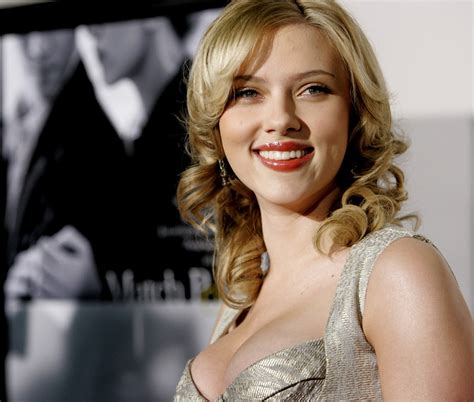

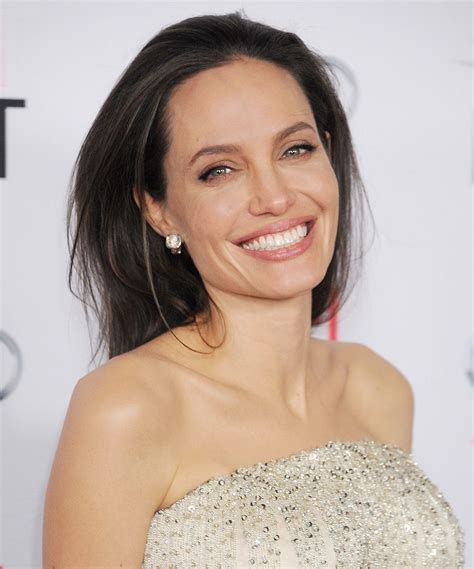

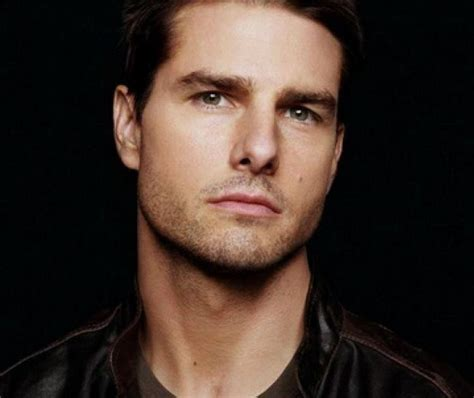

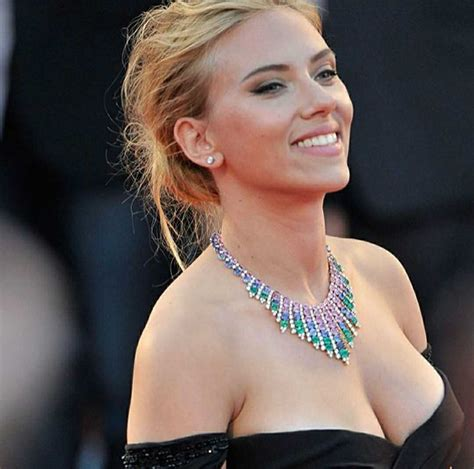

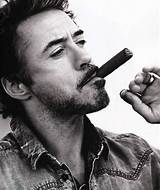

In [ ]:

import os
from PIL import Image
from IPython.display import display

# Specify the directory where your photos are located
photo_dir = "/content/combined_photos"  # Use the directory where you saved the combined photos

# Function to display images
def display_images(directory, num_images=5):
    image_files = [f for f in os.listdir(directory) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]
    num_photos = len(image_files)
    print(f"Total number of photos found: {num_photos}")

    if num_photos == 0 :
      print("No photos found in the specified directory.")
      return

    display_count = min(num_images, num_photos)

    for i in range(display_count):
        image_path = os.path.join(directory, image_files[i])
        try:
            img = Image.open(image_path)
            display(img)
        except Exception as e:
            print(f"Error displaying image {image_files[i]}: {e}")


# Call the function to display the images
display_images(photo_dir)

In [ ]:

from PIL import Image
import os

# Specify the source directory and the desired size
source_dir = "/content/combined_photos"
target_dir = "/content/rgb"
size = (256, 256)  # Example size, change as needed

# Create the target directory if it doesn't exist
os.makedirs(target_dir, exist_ok=True)

for filename in os.listdir(source_dir):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
        filepath = os.path.join(source_dir, filename)
        try:
            img = Image.open(filepath)
            img = img.resize(size)
            target_path = os.path.join(target_dir, filename)
            img.save(target_path)
        except Exception as e:
            print(f"Error processing file {filename}: {e}")

print(f"All images resized and saved to: {target_dir}")

All images resized and saved to: /content/rgb


In [ ]:
# Specify the source and destination directories
rgb_dir = "/content/rgb"
gray_dir = "/content/gray"

# Create the destination directory if it doesn't exist
os.makedirs(gray_dir, exist_ok=True)

# Iterate through the files in the rgb directory
for filename in os.listdir(rgb_dir):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
        rgb_filepath = os.path.join(rgb_dir, filename)
        gray_filepath = os.path.join(gray_dir, filename)

        try:
            # Open the image
            img = Image.open(rgb_filepath)

            # Convert to grayscale
            img_gray = img.convert("L")

            # Save the grayscale image
            img_gray.save(gray_filepath)

        except Exception as e:
            print(f"Error processing file {filename}: {e}")

print(f"All images converted to grayscale and saved to: {gray_dir}")

All images converted to grayscale and saved to: /content/gray


Directory: /content/rgb
Total number of images: 1800


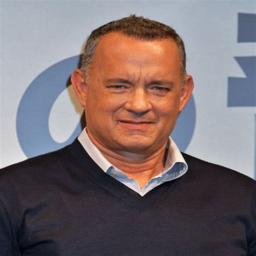

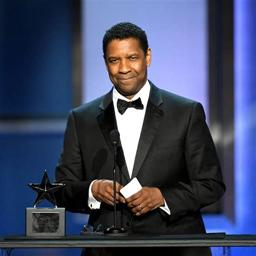

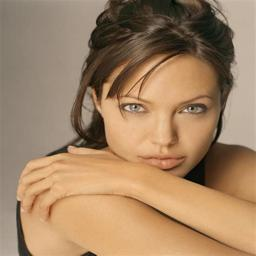

Directory: /content/gray
Total number of images: 1800


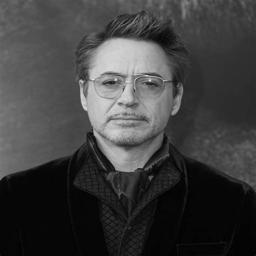

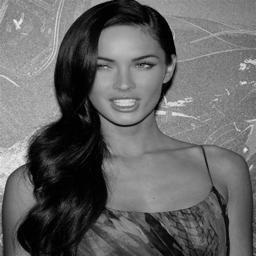

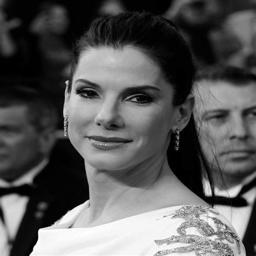

In [ ]:
import os
from PIL import Image
from IPython.display import display
import random

def summarize_and_display_images(directory, num_images=3):
    """Summarizes the contents of a directory and displays random images."""

    image_files = [f for f in os.listdir(directory) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]
    num_photos = len(image_files)

    print(f"Directory: {directory}")
    print(f"Total number of images: {num_photos}")

    if num_photos == 0:
        print("No images found in the directory.")
        return

    # Display random images
    random_image_files = random.sample(image_files, min(num_images, num_photos))
    for image_file in random_image_files:
      image_path = os.path.join(directory, image_file)
      try:
          img = Image.open(image_path)
          display(img)
      except Exception as e:
          print(f"Error displaying image {image_file}: {e}")

# Summarize and display images from the 'rgb' directory
summarize_and_display_images("/content/rgb")

# Summarize and display images from the 'gray' directory
summarize_and_display_images("/content/gray")

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import os
from PIL import Image

# Define the image dimensions
img_width = 256
img_height = 256
channels = 3  # RGB images

# Define the path to your image folders
rgb_dir = "/content/rgb"
gray_dir = "/content/gray"

# Load images
def load_images(directory):
    images = []
    for filename in os.listdir(directory):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
            img = Image.open(os.path.join(directory, filename))
            img = img.resize((img_width, img_height))
            img_array = np.array(img) / 255.0 # Normalize pixel values to [0, 1]
            images.append(img_array)
    return np.array(images)


rgb_images = load_images(rgb_dir)
gray_images = load_images(gray_dir)


# Build the autoencoder model
input_img = keras.Input(shape=(img_width, img_height, 1))  # Gray images are single channel


x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input_img)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)


# Bottleneck
encoded = layers.Conv2D(128, (3, 3), activation="relu", padding="same")(x)

# Decoder
x = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(3, (3, 3), activation="sigmoid", padding="same")(x)  # Output RGB image

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')


# Train the autoencoder
autoencoder.fit(gray_images, rgb_images, epochs=1000, batch_size=128) # Adjust epochs and batch_size

# Save the model
autoencoder.save('colorization_autoencoder.keras')

Epoch 1/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 536ms/step - loss: 0.0850
Epoch 2/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 439ms/step - loss: 0.0281
Epoch 3/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 443ms/step - loss: 0.0137
Epoch 4/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 444ms/step - loss: 0.0118
Epoch 5/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 444ms/step - loss: 0.0113
Epoch 6/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 445ms/step - loss: 0.0101
Epoch 7/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 445ms/step - loss: 0.0096
Epoch 8/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 447ms/step - loss: 0.0091
Epoch 9/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 451ms/step - loss: 0.0098
Epoch 10/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 449ms/step - loss: 0.0090
Epoch 11/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 452ms/step - loss: 0.0089
Epoch 12/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 453ms/step - loss: 0.0087
Epoch 13/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 455ms/step - loss: 0.0084
Epoch 14/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 455ms/step - loss: 0.0081
Epoch 15/1000
15/15 ━━━━━━━━

Saving photo14593261679.jpg to photo14593261679 (2).jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


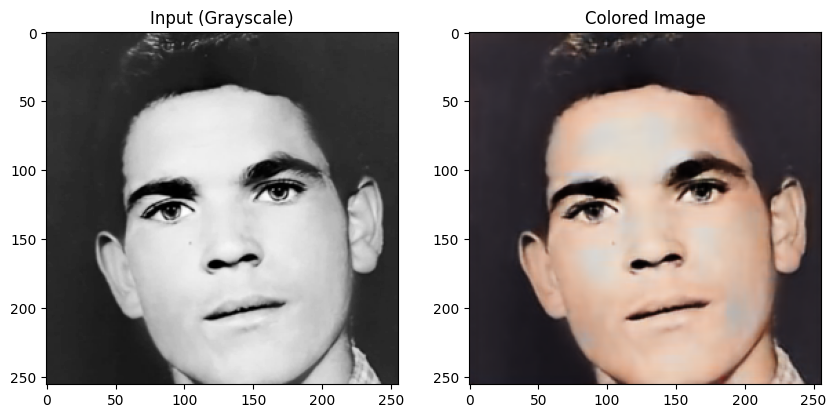

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
# Load the trained model
autoencoder = keras.models.load_model('colorization_autoencoder.keras')

# Take a picture (replace with your image input method)
# Example: Upload an image file
uploaded = files.upload()
image_path = list(uploaded.keys())[0]  # Get the uploaded file path

# Resize and convert to grayscale
try:
  img = Image.open(image_path)
  img = img.resize((256, 256))
  img_gray = img.convert("L")
  img_gray_array = np.array(img_gray) / 255.0  # Normalize pixel values
  img_gray_array = np.expand_dims(img_gray_array, axis=0)  # Add batch dimension
  img_gray_array = np.expand_dims(img_gray_array, axis=-1) # Add channel dimension

  # Colorize the image using the model
  colored_image_array = autoencoder.predict(img_gray_array)
  colored_image = Image.fromarray((colored_image_array[0] * 255).astype(np.uint8))


  # Display the input image and the colored image side by side
  plt.figure(figsize=(10, 5))
  plt.subplot(1, 2, 1)
  plt.imshow(img_gray, cmap='gray')
  plt.title('Input (Grayscale)')

  plt.subplot(1, 2, 2)
  plt.imshow(colored_image)
  plt.title('Colored Image')

  plt.show()

except FileNotFoundError:
  print(f"Error: Image file not found at {image_path}")
except Exception as e:
  print(f"An error occurred: {e}")

Saving pexels-yaomilakbar-7556428.jpg to pexels-yaomilakbar-7556428.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


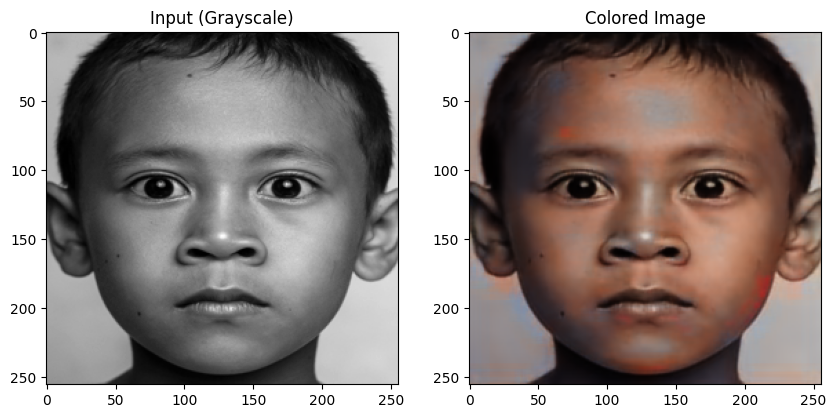

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
# Load the trained model
autoencoder = keras.models.load_model('colorization_autoencoder.keras')

# Take a picture (replace with your image input method)
# Example: Upload an image file
uploaded = files.upload()
image_path = list(uploaded.keys())[0]  # Get the uploaded file path

# Resize and convert to grayscale
try:
  img = Image.open(image_path)
  img = img.resize((256, 256))
  img_gray = img.convert("L")
  img_gray_array = np.array(img_gray) / 255.0  # Normalize pixel values
  img_gray_array = np.expand_dims(img_gray_array, axis=0)  # Add batch dimension
  img_gray_array = np.expand_dims(img_gray_array, axis=-1) # Add channel dimension

  # Colorize the image using the model
  colored_image_array = autoencoder.predict(img_gray_array)
  colored_image = Image.fromarray((colored_image_array[0] * 255).astype(np.uint8))


  # Display the input image and the colored image side by side
  plt.figure(figsize=(10, 5))
  plt.subplot(1, 2, 1)
  plt.imshow(img_gray, cmap='gray')
  plt.title('Input (Grayscale)')

  plt.subplot(1, 2, 2)
  plt.imshow(colored_image)
  plt.title('Colored Image')

  plt.show()

except FileNotFoundError:
  print(f"Error: Image file not found at {image_path}")
except Exception as e:
  print(f"An error occurred: {e}")

Saving images (1).jfif to images (1).jfif
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


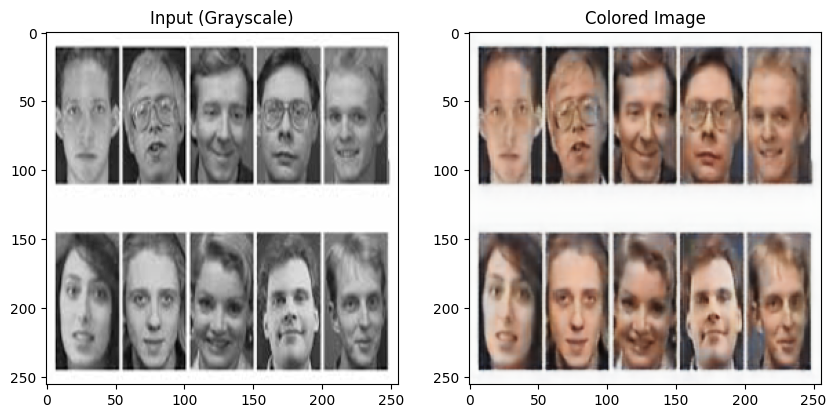

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
# Load the trained model
autoencoder = keras.models.load_model('colorization_autoencoder.keras')

# Take a picture (replace with your image input method)
# Example: Upload an image file
uploaded = files.upload()
image_path = list(uploaded.keys())[0]  # Get the uploaded file path

# Resize and convert to grayscale
try:
  img = Image.open(image_path)
  img = img.resize((256, 256))
  img_gray = img.convert("L")
  img_gray_array = np.array(img_gray) / 255.0  # Normalize pixel values
  img_gray_array = np.expand_dims(img_gray_array, axis=0)  # Add batch dimension
  img_gray_array = np.expand_dims(img_gray_array, axis=-1) # Add channel dimension

  # Colorize the image using the model
  colored_image_array = autoencoder.predict(img_gray_array)
  colored_image = Image.fromarray((colored_image_array[0] * 255).astype(np.uint8))


  # Display the input image and the colored image side by side
  plt.figure(figsize=(10, 5))
  plt.subplot(1, 2, 1)
  plt.imshow(img_gray, cmap='gray')
  plt.title('Input (Grayscale)')

  plt.subplot(1, 2, 2)
  plt.imshow(colored_image)
  plt.title('Colored Image')

  plt.show()

except FileNotFoundError:
  print(f"Error: Image file not found at {image_path}")
except Exception as e:
  print(f"An error occurred: {e}")